In [1]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
#from ImageDataset import ImageDataset
from image_dataset import ImageDataset
from torch import nn
import torch

# Set the path to the folder containing your unlabeled images
train_path = "data/DIV2K/train"
test_path = "data/DIV2K/valid"

# Define the transformation to be applied to each image
transform = transforms.Compose([
    #transforms.Resize((256, 256)),  # Resize the image to a fixed size
    transforms.RandomCrop((512,512)),
    transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomRotation(45),
    transforms.ToTensor()  # Convert the image to a tensor
])

# Create the ImageFolder dataset
train_data = ImageDataset(train_path, transform=transform)

test_data = ImageDataset(test_path, transform=transform)

In [2]:
from torch.utils.data import DataLoader
train_data_loader = DataLoader(dataset=train_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_data_loader = DataLoader(dataset=test_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

In [3]:
#img, label = train_data[0][0], train_data[0][1]
img = train_data[0]
#class_names = train_data.classes
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"img range = [{torch.min(img)}, {torch.max(img)}]")
#print(f"Image label: {label}")
#print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.4902, 0.4471, 0.4706,  ..., 0.1255, 0.1255, 0.1686],
         [0.5333, 0.5529, 0.5333,  ..., 0.1333, 0.1333, 0.1490],
         [0.5216, 0.5412, 0.5137,  ..., 0.2196, 0.1451, 0.1333],
         ...,
         [0.2118, 0.2039, 0.2039,  ..., 0.2745, 0.3176, 0.4510],
         [0.2039, 0.2118, 0.2039,  ..., 0.2902, 0.2902, 0.3255],
         [0.2275, 0.2157, 0.2078,  ..., 0.2784, 0.2627, 0.2510]],

        [[0.4235, 0.3922, 0.4353,  ..., 0.0353, 0.0235, 0.0549],
         [0.4627, 0.4824, 0.4667,  ..., 0.0392, 0.0314, 0.0431],
         [0.4235, 0.4471, 0.4157,  ..., 0.1176, 0.0510, 0.0314],
         ...,
         [0.1412, 0.1373, 0.1412,  ..., 0.0667, 0.0902, 0.1569],
         [0.1373, 0.1451, 0.1412,  ..., 0.0196, 0.0392, 0.0824],
         [0.1490, 0.1451, 0.1412,  ..., 0.0235, 0.0392, 0.0353]],

        [[0.4588, 0.4118, 0.3961,  ..., 0.1176, 0.0549, 0.0627],
         [0.4000, 0.3882, 0.3451,  ..., 0.1529, 0.1098, 0.0745],
         [0.3098, 0.3176, 0.2902,  ..., 0.22

Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

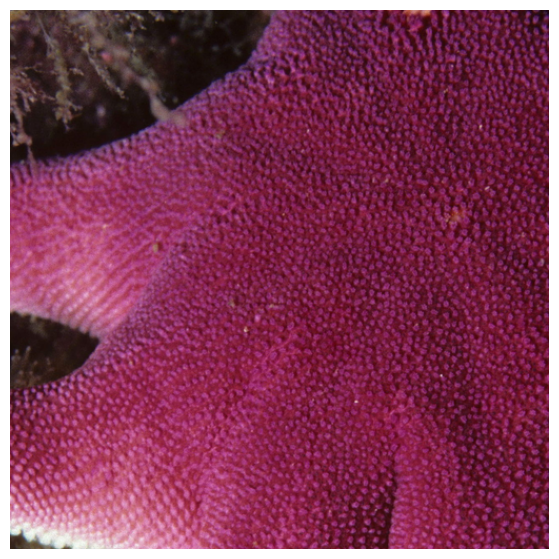

In [4]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
#plt.title(class_names[label], fontsize=14)

In [5]:
next(iter(train_data_loader)).shape

torch.Size([8, 3, 512, 512])

In [6]:
from pathlib import Path
# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "autoencoder_upsampler_res_blocks_2_without_mean.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [7]:
#from autoencoder_upscale_model import AutoencoderUpscaleModel
import torch
from residual_upsampler_2 import ResidualUpsampler2
#from my_upscale_model import UpscaleModel
from my_upscale_model2 import UpscaleModel2
##from autoencoder_upsampler_2 import AutoencoderUpsampler2
from train_autoencoder import downsample_image

device = "cpu"

batch = next(iter(test_data_loader))

#model = UpscaleModel2()
#model = AutoencoderUpsampler2()
model = ResidualUpsampler2()

model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

model.to(device)

img = downsample_image(batch, 4)
model.eval()
with torch.inference_mode():
    result = model(img.to(device))



Original shape: torch.Size([3, 128, 128]) -> [color_channels, height, width]
Image permute shape: torch.Size([128, 128, 3]) -> [height, width, color_channels]


(-0.5, 127.5, 127.5, -0.5)

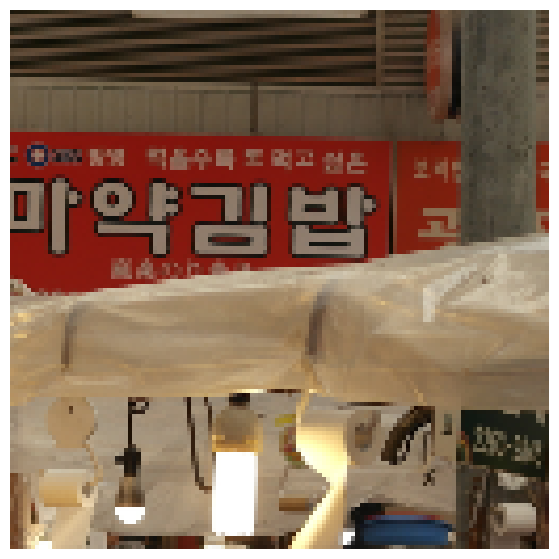

In [8]:
img = downsample_image(batch, 4)[1]
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [9]:
img

tensor([[[0.1059, 0.1216, 0.1196,  ..., 0.3304, 0.2843, 0.2853],
         [0.3686, 0.3706, 0.3814,  ..., 0.3833, 0.3627, 0.3480],
         [0.3980, 0.3931, 0.3814,  ..., 0.3078, 0.2520, 0.2686],
         ...,
         [0.4304, 0.4843, 0.4833,  ..., 0.3412, 0.2725, 0.3020],
         [0.4137, 0.4373, 0.5304,  ..., 0.2843, 0.2608, 0.3284],
         [0.4578, 0.4569, 0.4941,  ..., 0.2333, 0.2686, 0.3176]],

        [[0.0931, 0.0941, 0.0961,  ..., 0.2833, 0.2294, 0.2431],
         [0.2902, 0.2941, 0.3029,  ..., 0.3343, 0.2951, 0.2853],
         [0.3235, 0.3225, 0.3118,  ..., 0.2667, 0.2108, 0.2137],
         ...,
         [0.2804, 0.3363, 0.3549,  ..., 0.2363, 0.1716, 0.1892],
         [0.2402, 0.2735, 0.3951,  ..., 0.2039, 0.1569, 0.2118],
         [0.2794, 0.2804, 0.3549,  ..., 0.1569, 0.1676, 0.1990]],

        [[0.0471, 0.0431, 0.0431,  ..., 0.2108, 0.1539, 0.1686],
         [0.2186, 0.2167, 0.2275,  ..., 0.2608, 0.2186, 0.2039],
         [0.2461, 0.2480, 0.2392,  ..., 0.1980, 0.1441, 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

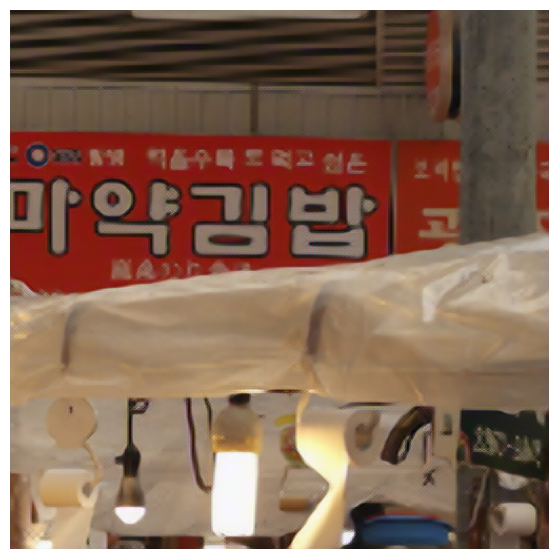

In [10]:
img = result[1].cpu()
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [11]:
result.shape

torch.Size([8, 3, 512, 512])

In [12]:
img.shape

torch.Size([3, 512, 512])

In [13]:
result[1]

tensor([[[0.1421, 0.1114, 0.1459,  ..., 0.2622, 0.2857, 0.2817],
         [0.1358, 0.1434, 0.1241,  ..., 0.2992, 0.3088, 0.2562],
         [0.1933, 0.1430, 0.1398,  ..., 0.2710, 0.2882, 0.3100],
         ...,
         [0.4311, 0.4584, 0.4823,  ..., 0.2979, 0.3448, 0.2882],
         [0.4544, 0.4583, 0.4624,  ..., 0.2924, 0.3085, 0.3274],
         [0.3912, 0.4501, 0.4715,  ..., 0.3016, 0.2958, 0.2635]],

        [[0.1251, 0.0791, 0.0922,  ..., 0.2233, 0.2240, 0.2260],
         [0.1117, 0.1023, 0.0960,  ..., 0.2425, 0.2573, 0.2257],
         [0.1519, 0.1007, 0.1027,  ..., 0.2434, 0.2392, 0.2432],
         ...,
         [0.2833, 0.2750, 0.2776,  ..., 0.1937, 0.2033, 0.1945],
         [0.2841, 0.2787, 0.3017,  ..., 0.1767, 0.1956, 0.2084],
         [0.2815, 0.2790, 0.2805,  ..., 0.1933, 0.1825, 0.1791]],

        [[0.1080, 0.0795, 0.1192,  ..., 0.1734, 0.1668, 0.1961],
         [0.0988, 0.0932, 0.0536,  ..., 0.1875, 0.1781, 0.1753],
         [0.1164, 0.0780, 0.0870,  ..., 0.1727, 0.1623, 0.

In [14]:
img1 = downsample_image(batch, factor=4)
img1.shape

torch.Size([8, 3, 128, 128])

In [15]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[ 0.0830, -0.0082, -0.0576,  0.0306, -0.0404],
          [ 0.1118,  0.1049, -0.0136, -0.0743,  0.0476],
          [-0.0739, -0.0040, -0.0432, -0.1359,  0.0297],
          [ 0.0255, -0.1247, -0.0418, -0.0219,  0.0327],
          [ 0.0829, -0.0716, -0.1014,  0.0524,  0.0284]],

         [[-0.0697,  0.0976, -0.0786, -0.0749, -0.0781],
          [-0.0907, -0.0211, -0.1042,  0.0969, -0.0006],
          [ 0.0302,  0.0132,  0.1338,  0.1472, -0.0981],
          [-0.0183,  0.1296,  0.0306, -0.1072, -0.0721],
          [-0.0202,  0.1119, -0.0023, -0.0256,  0.0571]],

         [[-0.0141,  0.1007,  0.0630,  0.0507,  0.0773],
          [-0.0952, -0.0790, -0.0769, -0.0747,  0.0493],
          [ 0.0941,  0.0589, -0.0843, -0.0407,  0.0257],
          [ 0.0870, -0.0328,  0.0443,  0.0942,  0.1053],
          [ 0.0097, -0.0254, -0.0729,  0.0267, -0.0061]]],


        [[[-0.0595,  0.0334, -0.0859,  0.0938,  0.0023],
          [-0.0784, -0.1038, -0.0714,  0.0334, -0.0118],
 

In [16]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [17]:
batch.shape, result.shape

(torch.Size([8, 3, 512, 512]), torch.Size([8, 3, 512, 512]))

In [18]:
loss = loss_fn(result, batch.to(device))
loss

tensor(28626.5625)

In [19]:
type(model)

residual_upsampler_2.ResidualUpsampler2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

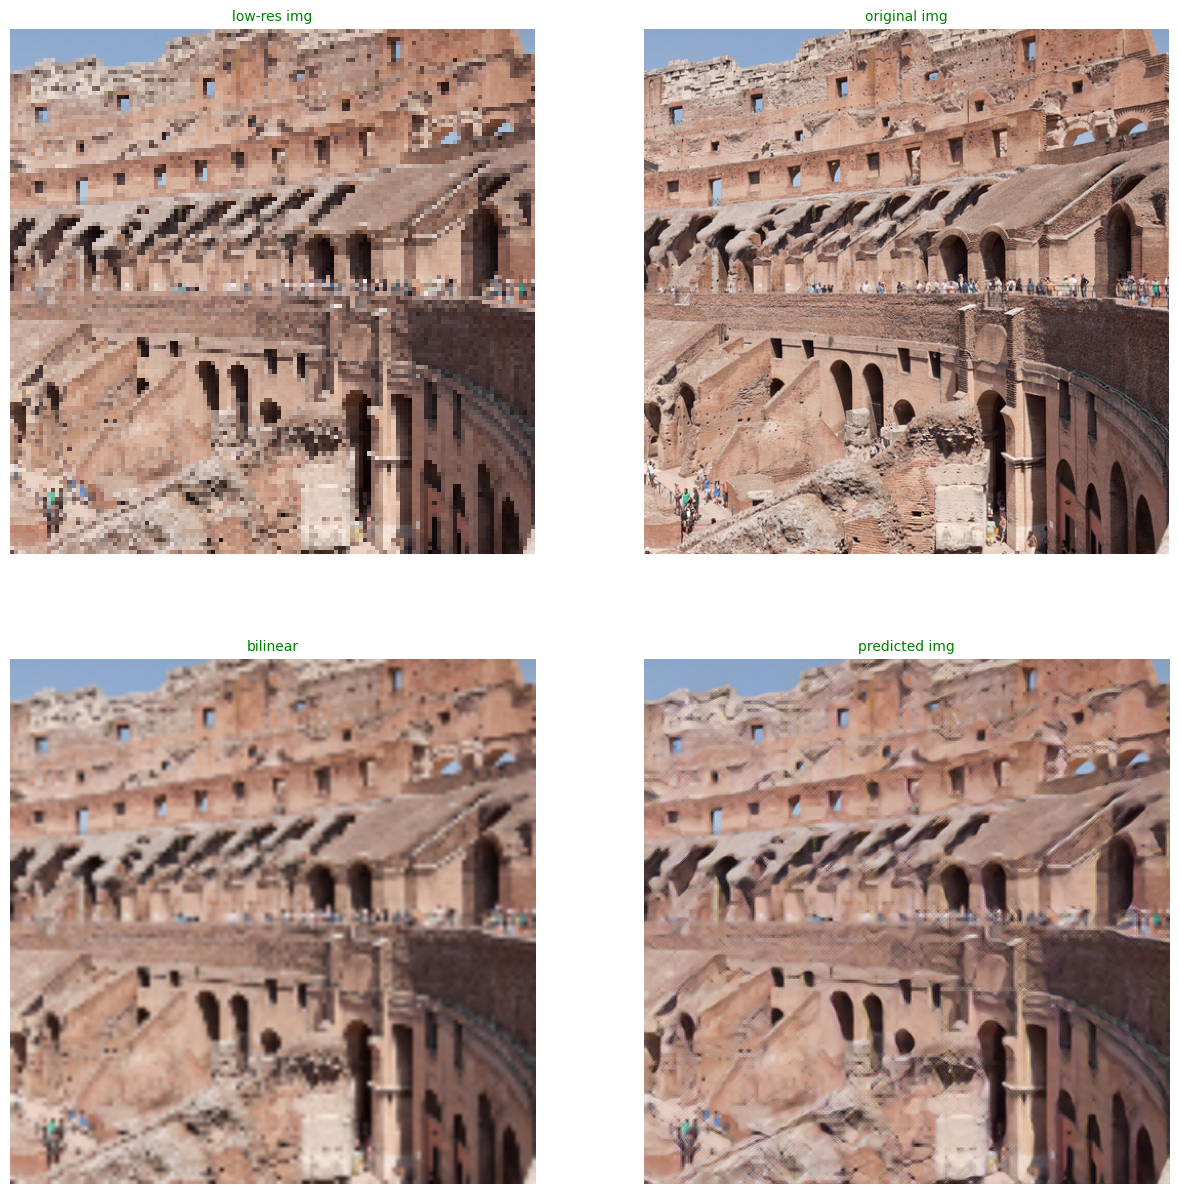

In [42]:
i = 0
y = batch[i]
y_pred = result[i]

upsample = nn.Upsample(scale_factor=4, mode="bilinear")

# Plot predictions
plt.figure(figsize=(15, 15))
nrows = 2
ncols = 2

plt.subplot(nrows, ncols, 1)
plt.imshow(downsample_image(y.unsqueeze(dim=0), factor=4).squeeze().permute(1, 2, 0))
plt.title("low-res img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 3)
plt.imshow(upsample(downsample_image(y.unsqueeze(dim=0), factor=4)).squeeze().permute(1, 2, 0))
plt.title("bilinear", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 4)
plt.imshow(y_pred.permute(1, 2, 0))
plt.title("predicted img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 2)
plt.imshow(y.permute(1, 2, 0))
plt.title("original img", fontsize=10, c="g") # green text if correct
plt.axis(False)

In [21]:
from vgg_loss import VGGLoss
vgg_loss_fn = VGGLoss(device="cpu")


f:\Programms\deep_learning\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
f:\Programms\deep_learning\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
some_loss = vgg_loss_fn.forward_demo(batch[i])
some_loss.shape

torch.Size([512, 64, 64])

In [23]:
i=0
for param in vgg_loss_fn.vgg.parameters():
    print(param.shape)
    i+=1
i

torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])


20

Original shape: torch.Size([64, 64]) -> [height, width]


(-0.5, 63.5, 63.5, -0.5)

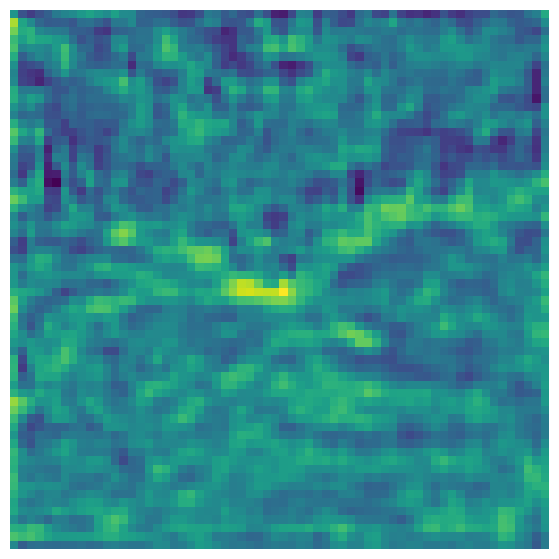

In [24]:
img = some_loss[11].cpu()

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [height, width]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")

In [25]:
# from collections import OrderedDict

# import torch
# from torch import nn, optim

# from ignite.engine import *
# from ignite.handlers import *
# from ignite.metrics import *
# from ignite.utils import *
# from ignite.contrib.metrics.regression import *
# from ignite.contrib.metrics import *

# # create default evaluator for doctests

# def eval_step(engine, batch):
#     return batch

# default_evaluator = Engine(eval_step)

# # create default optimizer for doctests

# param_tensor = torch.zeros([1], requires_grad=True)
# default_optimizer = torch.optim.SGD([param_tensor], lr=0.1)

# # create default trainer for doctests
# # as handlers could be attached to the trainer,
# # each test must define his own trainer using `.. testsetup:`

# def get_default_trainer():

#     def train_step(engine, batch):
#         return batch

#     return Engine(train_step)

# # create default model for doctests

# default_model = nn.Sequential(OrderedDict([
#     ('base', nn.Linear(4, 2)),
#     ('fc', nn.Linear(2, 1))
# ]))

# #manual_seed(666)

# test_y_pred = torch.randn((3,512,512))

# from ignite.metrics import *
# metric = SSIM(data_range=1.0)
# metric.attach(default_evaluator, 'ssim')
# state = default_evaluator.run([[y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0)]])
# print(state.metrics['ssim'])
# print(f"ssim loss = {torch.tensor((1 - state.metrics['ssim'])/2)}")

In [26]:
# from custom_loss import SSIMLoss, VGGPerceptualLoss, SSIM, CombinedLoss

# ssim_loss_fn = SSIM(window_size=11,sigma=1.5)
# vgg_loss_fn = VGGPerceptualLoss()
# vgg_ssim_fn = CombinedLoss(loss_shift=1.0)
# ssim_loss_res = ssim_loss_fn(y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0))
# vgg_loss_fn.to('cuda')
# vgg_loss_res = vgg_loss_fn(y_pred.unsqueeze(dim=0).to('cuda'), y.unsqueeze(dim=0).to('cuda'))
# true_loss_res = vgg_ssim_fn(y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0))
# loss_res = vgg_loss_res + 1 * ssim_loss_res
# #vgg_loss_fn.to('cuda')
# for param in vgg_loss_fn.parameters():
#     print(param.device)
# ssim_loss_res, vgg_loss_res, loss_res, true_loss_res

In [27]:
import math

window_size = 11
sigma = 1.5
gauss = torch.Tensor([math.exp(-(x - window_size // 2) ** 2 / float(2 * sigma ** 2)) for x in range(window_size)])
window = gauss.unsqueeze(0) * gauss.unsqueeze(1)

In [28]:
gauss

tensor([0.0039, 0.0286, 0.1353, 0.4111, 0.8007, 1.0000, 0.8007, 0.4111, 0.1353,
        0.0286, 0.0039])

(-0.5, 10.5, 10.5, -0.5)

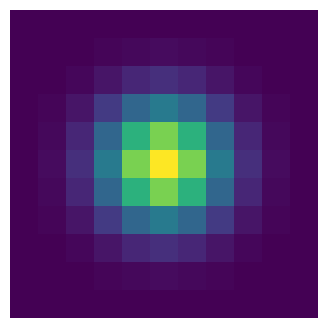

In [29]:
plt.figure(figsize=(4, 4))
plt.imshow(window)
plt.axis("off")

In [30]:
from train_statistics import TrainingStatisticsLogger
import os
print(os.getcwd())
logger = TrainingStatisticsLogger()
logger.load_from_json(filename='log/autoencoder_upsampler_res_blocks_2_test_log.json')
logger.ssim.__len__()
loggert = TrainingStatisticsLogger()
loggert.load_from_json(filename='log/autoencoder_upsampler_res_blocks_2_train_log.json')
loggert.ssim.__len__()

f:\Programms\deep_learning\diploma


380

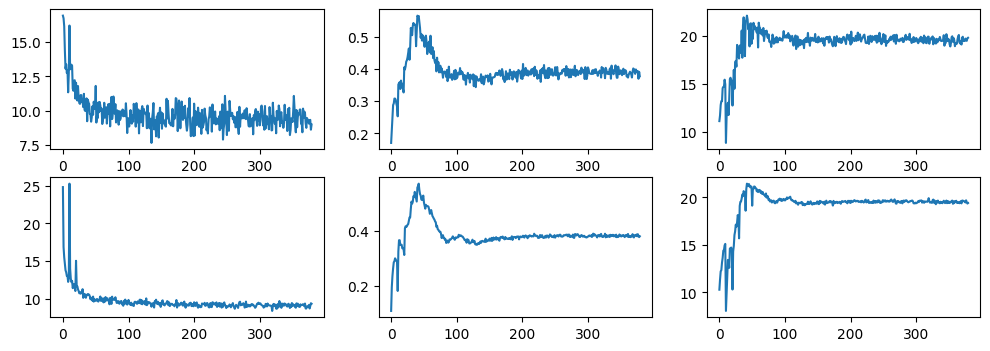

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(2,3,1)
plt.plot(logger.epoch_loss)
plt.subplot(2,3,2)
plt.plot(logger.ssim)
plt.subplot(2,3,3)
plt.plot(logger.psnr)
#plt.subplot(2,3,4)
#plt.plot(logger.epoch_training_time)
plt.subplot(2,3,4)
plt.plot(loggert.epoch_loss)
plt.subplot(2,3,5)
plt.plot(loggert.ssim)
plt.subplot(2,3,6)
plt.plot(loggert.psnr)

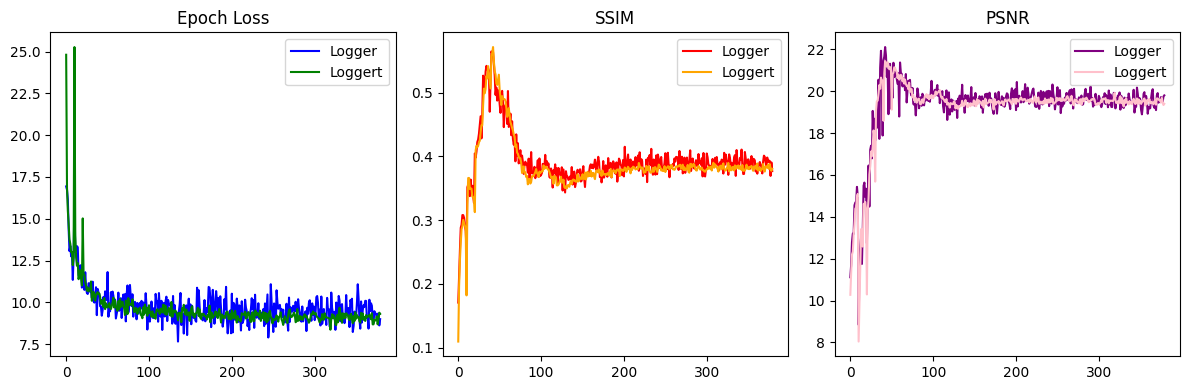

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot 1
plt.subplot(1, 3, 1)
plt.plot(logger.epoch_loss, color='blue')
plt.plot(loggert.epoch_loss, color='green')
plt.title('Epoch Loss')
plt.legend(['Logger', 'Loggert'])

# Plot 2
plt.subplot(1, 3, 2)
plt.plot(logger.ssim, color='red')
plt.plot(loggert.ssim, color='orange')
plt.title('SSIM')
plt.legend(['Logger', 'Loggert'])

# Plot 3
plt.subplot(1, 3, 3)
plt.plot(logger.psnr, color='purple')
plt.plot(loggert.psnr, color='pink')
plt.title('PSNR')
plt.legend(['Logger', 'Loggert'])

plt.tight_layout()
plt.show()


torch.Size([1, 128, 256, 256])
Original shape: torch.Size([256, 256]) -> [height, width]


(-0.5, 255.5, 255.5, -0.5)

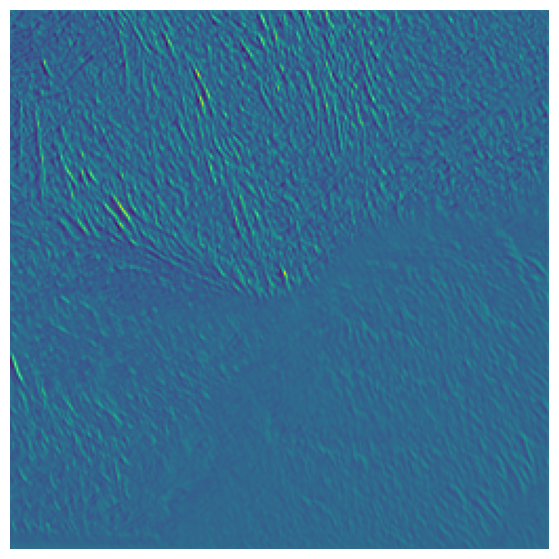

In [33]:
from custom_loss import VGG
vgg_loss = VGG('22')

sm_ls = vgg_loss.forward1(y.unsqueeze(0))
print(sm_ls.shape)
img = sm_ls[0][1].cpu().squeeze()

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [height, width]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")

In [34]:
sm_ls = vgg_loss.forward(upsample(downsample_image(y.unsqueeze(dim=0), factor=4)), y.unsqueeze(0))
sm_ls

tensor(14.0769)

In [35]:
from metrics import SSIM, PSNR


ssim = SSIM()
print(f'bilinear: {ssim(upsample(downsample_image(y.unsqueeze(dim=0), factor=4)), y.unsqueeze(0))}')
print(f'bilinear: {ssim(y_pred.unsqueeze(dim=0), y.unsqueeze(0))}')

bilinear: 0.701660692691803
bilinear: 0.6571924090385437


In [36]:
class MeanShift(nn.Conv2d):
    def __init__(
        self, rgb_range,
        rgb_mean=(0.4488, 0.4371, 0.4040), rgb_std=(1.0, 1.0, 1.0), sign=-1):

        super(MeanShift, self).__init__(3, 3, kernel_size=1)
        std = torch.Tensor(rgb_std)
        self.weight.data = torch.eye(3).view(3, 3, 1, 1) / std.view(3, 1, 1, 1)
        self.bias.data = sign * rgb_range * torch.Tensor(rgb_mean) / std
        for p in self.parameters():
            p.requires_grad = False

class MeanTester(nn.Module):
    def __init__(self, rgb_range=1):
        super(MeanTester, self).__init__()
        vgg_mean = (0.485, 0.456, 0.406)
        vgg_std = (0.229 * rgb_range, 0.224 * rgb_range, 0.225 * rgb_range)
        self.sub_mean = MeanShift(rgb_range, vgg_mean, vgg_std)

    def forward(self, sr):
        def _forward(x):
            x = self.sub_mean(x)
            return x
        sr = _forward(sr)
        return sr
mean_tester = MeanTester()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

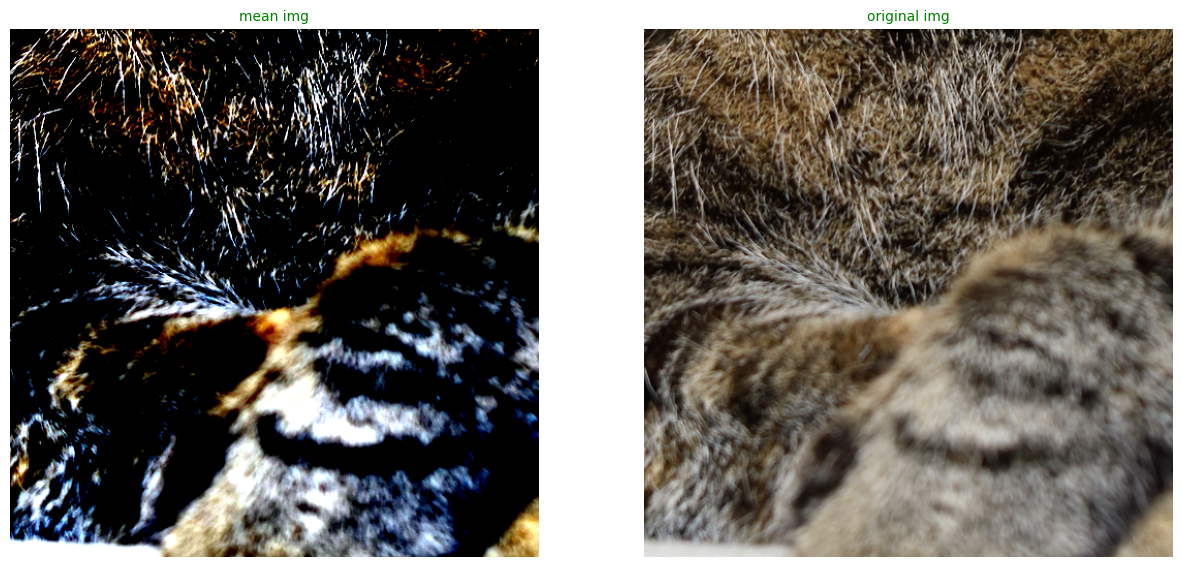

In [37]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(mean_tester(y).permute(1, 2, 0))
plt.title("mean img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(y.permute(1, 2, 0))
plt.title("original img", fontsize=10, c="g") # green text if correct
plt.axis(False)

In [38]:
from torch.nn import functional as F
from custom_loss import VGGWithSSIM2
vgg_loss2 = VGGWithSSIM2('22')
mse = nn.MSELoss()
print(F.mse_loss(mean_tester(y), y))
print(mse(mean_tester(y), y))

print(vgg_loss(y_pred, y))
print(vgg_loss2(y_pred, y))

tensor(0.9658)
tensor(0.9658)
tensor(12.3812)
tensor(0.9410)


In [39]:
mean_tester(y)

tensor([[[-1.0219, -0.9705, -1.1760,  ..., -0.6281, -0.6281, -0.3883],
         [-1.2788, -1.2445, -1.5014,  ..., -0.7650, -0.6452, -0.1657],
         [-0.8335, -1.2617, -1.6042,  ..., -0.9192, -0.5424,  0.1083],
         ...,
         [ 1.6838,  1.6838,  1.6838,  ...,  0.8276,  0.8618,  0.9132],
         [ 1.6838,  1.7009,  1.7009,  ...,  0.8618,  0.8618,  0.8961],
         [ 1.6838,  1.7009,  1.7009,  ...,  0.8618,  0.8789,  0.8789]],

        [[-1.2479, -1.1954, -1.4055,  ..., -0.9328, -0.8978, -0.6001],
         [-1.4580, -1.4405, -1.6856,  ..., -1.1078, -0.8978, -0.3550],
         [-0.9503, -1.3880, -1.7206,  ..., -1.2304, -0.7577, -0.0049],
         ...,
         [ 1.8508,  1.8508,  1.8508,  ...,  0.6779,  0.7129,  0.8004],
         [ 1.8508,  1.8683,  1.8859,  ...,  0.7129,  0.7129,  0.7829],
         [ 1.8508,  1.8683,  1.8859,  ...,  0.7129,  0.7479,  0.7654]],

        [[-1.4210, -1.3339, -1.4559,  ..., -1.1073, -1.1073, -0.9504],
         [-1.5430, -1.5256, -1.7173,  ..., -1